In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("../data/02_intermediate/merged_data.csv")

In [6]:
df


,origin,destination,departure_date,query_date,days_before_departure,airline,price,currency,stops,flight_duration,cabin,offer_rank,departure_time,arrival_time,source
0,CDG,AMS,2026-01-15,2026-01-03,12,Air France,117.0,EUR,1,495,ECONOMY,1,"9:20 AM on Thu, Jan 15","5:35 PM on Thu, Jan 15",google_flights
1,CDG,AMS,2026-01-15,2026-01-03,12,Norwegian,119.0,EUR,1,380,ECONOMY,2,"12:35 PM on Thu, Jan 15","6:55 PM on Thu, Jan 15",google_flights
2,CDG,AMS,2026-01-15,2026-01-03,12,Air France,125.0,EUR,1,375,ECONOMY,3,"9:20 AM on Thu, Jan 15","3:35 PM on Thu, Jan 15",google_flights
3,CDG,AMS,2026-01-15,2026-01-03,12,Air France,117.0,EUR,1,635,ECONOMY,4,"7:00 AM on Thu, Jan 15","5:35 PM on Thu, Jan 15",google_flights
4,CDG,AMS,2026-01-16,2026-01-03,13,Norwegian,127.0,EUR,1,305,ECONOMY,1,"12:30 PM on Fri, Jan 16","5:35 PM on Fri, Jan 16",google_flights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152865,LHR,ATL,2026-06-30,2026-01-30,151,Lufthansa City Airlines,699.0,EUR,1,735,ECONOMY,1,"6:30 AM on Tue, Jun 30","1:45 PM on Tue, Jun 30",google_flights
152866,LHR,ATL,2026-06-30,2026-01-30,151,United,756.0,EUR,1,756,ECONOMY,2,"4:40 PM on Tue, Jun 30","12:16 AM on Wed, Jul 1",google_flights
152867,LHR,ATL,2026-06-30,2026-01-30,151,Air Canada,759.0,EUR,1,725,ECONOMY,3,"2:10 PM on Tue, Jun 30","9:15 PM on Tue, Jun 30",google_flights
152868,LHR,ATL,2026-06-30,2026-01-30,151,British Airways,710.0,EUR,1,908,ECONOMY,4,"8:20 AM on Tue, Jun 30","6:28 PM on Tue, Jun 30",google_flights


In [7]:
df.columns

Index(['origin', 'destination', 'departure_date', 'query_date',
       'days_before_departure', 'airline', 'price', 'currency', 'stops',
       'flight_duration', 'cabin', 'offer_rank', 'departure_time',
       'arrival_time', 'source'],
      dtype='object')

In [8]:
unique_flights = (
    df
    .groupby(["origin", "destination", "airline","departure_date" ,"departure_time"])
    .size()
    .reset_index(name="count")
)

In [9]:
unique_flights["count"].unique() , len(unique_flights["count"].unique())

(array([ 3,  1,  4,  6,  2,  8,  7, 18, 19, 11, 10, 15, 20, 12,  5,  9, 17,
        16, 14, 13, 22, 21, 25, 35, 28, 34, 27, 32, 29, 23, 26, 24, 39, 37,
        30, 44, 33, 38, 31]),
 39)

In [7]:
unique_flights["count"].describe()

count    29512.000000
mean         5.179927
std          5.881577
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max         44.000000
Name: count, dtype: float64

<Axes: >

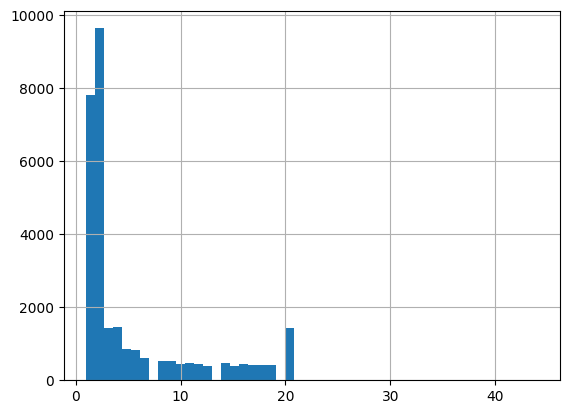

In [12]:
unique_flights["count"].hist(bins=50)

In [27]:
(unique_flights["count"] > 15).sum()

3228

In [26]:
df_filtered = (
    df
    .groupby(["origin", "destination", "airline", "departure_time"])
    .filter(lambda x: len(x) > 15)
)
df_filtered

,origin,destination,departure_date,query_date,days_before_departure,airline,price,currency,stops,flight_duration,cabin,offer_rank,departure_time,arrival_time,source
36,CDG,AMS,2026-01-24,2026-01-03,21,Iberia,101.0,EUR,1,480,ECONOMY,1,"7:00 AM on Sat, Jan 24","3:00 PM on Sat, Jan 24",google_flights
65,CDG,AMS,2026-01-31,2026-01-03,28,Air France,145.0,EUR,0,80,ECONOMY,2,"12:35 PM on Sat, Jan 31","1:55 PM on Sat, Jan 31",google_flights
68,CDG,AMS,2026-02-01,2026-01-03,29,Air France,145.0,EUR,0,80,ECONOMY,1,"2:20 PM on Sun, Feb 1","3:40 PM on Sun, Feb 1",google_flights
69,CDG,AMS,2026-02-01,2026-01-03,29,Air France,145.0,EUR,0,85,ECONOMY,2,"4:55 PM on Sun, Feb 1","6:20 PM on Sun, Feb 1",google_flights
74,CDG,AMS,2026-02-02,2026-01-03,30,Air France,145.0,EUR,0,80,ECONOMY,3,"12:35 PM on Mon, Feb 2","1:55 PM on Mon, Feb 2",google_flights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142140,FCO,CDG,2026-05-30,2026-01-30,120,ITA,145.0,EUR,0,130,ECONOMY,1,"9:30 PM on Sat, May 30","11:40 PM on Sat, May 30",google_flights
142146,FCO,CDG,2026-05-31,2026-01-30,121,ITA,109.0,EUR,0,130,ECONOMY,2,"9:30 PM on Sun, May 31","11:40 PM on Sun, May 31",google_flights
142147,FCO,CDG,2026-05-31,2026-01-30,121,ITA,145.0,EUR,0,130,ECONOMY,3,"8:35 AM on Sun, May 31","10:45 AM on Sun, May 31",google_flights
142148,FCO,CDG,2026-05-31,2026-01-30,121,ITA,145.0,EUR,0,130,ECONOMY,4,"3:10 PM on Sun, May 31","5:20 PM on Sun, May 31",google_flights


In [90]:
flight_cols = ["origin", "destination", "airline", "departure_time"]

random_flight = (
    df_filtered[flight_cols]
    .drop_duplicates()
    .sample(1, random_state=None)  # remove random_state for true randomness
)

In [91]:
df_flight = df.merge(
    random_flight,
    on=flight_cols,
    how="inner"
)
df_flight

,origin,destination,departure_date,query_date,days_before_departure,airline,price,currency,stops,flight_duration,cabin,offer_rank,departure_time,arrival_time,source
0,FCO,CDG,2026-01-29,2026-01-04,25,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
1,FCO,CDG,2026-01-29,2026-01-05,24,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
2,FCO,CDG,2026-01-29,2026-01-06,23,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
3,FCO,CDG,2026-01-29,2026-01-08,21,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
4,FCO,CDG,2026-01-29,2026-01-09,20,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
5,FCO,CDG,2026-01-29,2026-01-12,17,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
6,FCO,CDG,2026-01-29,2026-01-13,16,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,2,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
7,FCO,CDG,2026-01-29,2026-01-14,15,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,2,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
8,FCO,CDG,2026-01-29,2026-01-15,14,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights
9,FCO,CDG,2026-01-29,2026-01-16,13,Scandinavian Airlines,105.0,EUR,1,450,ECONOMY,1,"11:55 AM on Thu, Jan 29","7:25 PM on Thu, Jan 29",google_flights


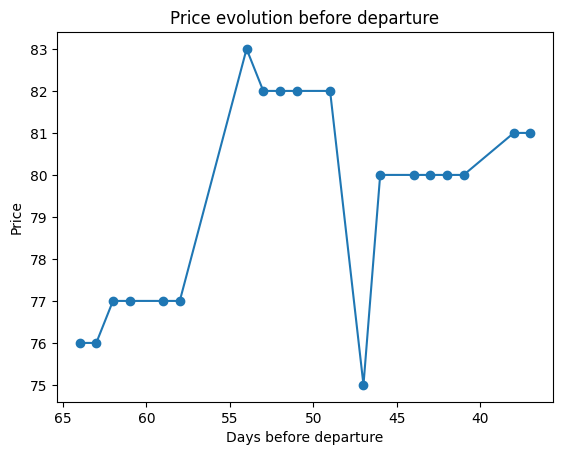

In [232]:
import matplotlib.pyplot as plt
flight_cols = ["origin", "destination", "airline", "departure_time"]

random_flight = (
    df_filtered[flight_cols]
    .drop_duplicates()
    .sample(1, random_state=None)  # remove random_state for true randomness
)
df_flight = df.merge(
    random_flight,
    on=flight_cols,
    how="inner"
)
df_flight
plt.figure()
plt.plot(
    df_flight["days_before_departure"],
    df_flight["price"],
    marker="o"
)
plt.xlabel("Days before departure")
plt.ylabel("Price")
plt.title("Price evolution before departure")
plt.gca().invert_xaxis()  # optional but common: closer to departure on the right
plt.show()


In [31]:
flight_cols = ["origin", "destination", "airline", "departure_time"]

df = df[
    df.groupby(flight_cols)["departure_time"]
      .transform("size") > 15
]

In [35]:
df

,origin,destination,departure_date,query_date,days_before_departure,airline,price,currency,stops,flight_duration,cabin,offer_rank,departure_time,arrival_time,source
36,CDG,AMS,2026-01-24,2026-01-03,21,Iberia,101.0,EUR,1,480,ECONOMY,1,"7:00 AM on Sat, Jan 24","3:00 PM on Sat, Jan 24",google_flights
65,CDG,AMS,2026-01-31,2026-01-03,28,Air France,145.0,EUR,0,80,ECONOMY,2,"12:35 PM on Sat, Jan 31","1:55 PM on Sat, Jan 31",google_flights
68,CDG,AMS,2026-02-01,2026-01-03,29,Air France,145.0,EUR,0,80,ECONOMY,1,"2:20 PM on Sun, Feb 1","3:40 PM on Sun, Feb 1",google_flights
69,CDG,AMS,2026-02-01,2026-01-03,29,Air France,145.0,EUR,0,85,ECONOMY,2,"4:55 PM on Sun, Feb 1","6:20 PM on Sun, Feb 1",google_flights
74,CDG,AMS,2026-02-02,2026-01-03,30,Air France,145.0,EUR,0,80,ECONOMY,3,"12:35 PM on Mon, Feb 2","1:55 PM on Mon, Feb 2",google_flights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142140,FCO,CDG,2026-05-30,2026-01-30,120,ITA,145.0,EUR,0,130,ECONOMY,1,"9:30 PM on Sat, May 30","11:40 PM on Sat, May 30",google_flights
142146,FCO,CDG,2026-05-31,2026-01-30,121,ITA,109.0,EUR,0,130,ECONOMY,2,"9:30 PM on Sun, May 31","11:40 PM on Sun, May 31",google_flights
142147,FCO,CDG,2026-05-31,2026-01-30,121,ITA,145.0,EUR,0,130,ECONOMY,3,"8:35 AM on Sun, May 31","10:45 AM on Sun, May 31",google_flights
142148,FCO,CDG,2026-05-31,2026-01-30,121,ITA,145.0,EUR,0,130,ECONOMY,4,"3:10 PM on Sun, May 31","5:20 PM on Sun, May 31",google_flights
